In [2]:
import os
import datetime
timestamp = datetime.datetime.now()
from sklearn.decomposition import PCA
import seaborn as sns
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import numpy.ma as ma
import pandas as pd
from PIL import ImageColor
from sklearn.cluster import KMeans
import shap



In [3]:
df_results = pd.read_csv('results.csv')
df_results.head()

,method,masked,grey,red,green,blue,SRM,EBC,brightness
0,random sampling,True,81,157,56,9,17,33,47
1,pca + random sampling,True,79,155,54,7,17,33,46
2,most dominant,True,80,153,52,4,18,35,47
3,pca + most dominant,True,79,155,54,7,17,33,46
4,raw,False,79,155,53,7,17,33,46


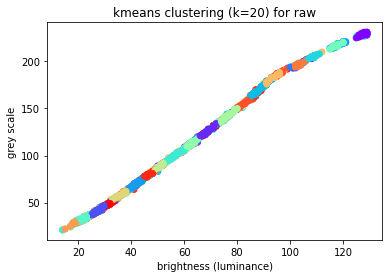

In [4]:
# to view the data 
#first make a result matrix for each configuration
configuration = ['most dominant', 'pca + most dominant', 
                 'pca + random sampling', 'random sampling', 'raw']

# Normalize
# to eliminate diffrent range effect 
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X
    

for method in configuration:
    df_results_method = df_results[df_results['method']==method]
    x = df_results_method.iloc[:,8:10]
    x = df_results_method[['grey', 'red', 'green', 'blue', 'SRM','EBC', 'brightness']]
    x = normalize(x)
    kmeans = KMeans(20, random_state = 42)
    kmeans.fit(x)
    identified_clusters = kmeans.fit_predict(x)
    data_with_clusters = df_results_method.copy()
    data_with_clusters['Clusters'] = identified_clusters 
    plt.scatter(data_with_clusters['brightness'],data_with_clusters['grey'],c=data_with_clusters['Clusters'],cmap='rainbow')
    plt.xlabel('brightness (luminance)')
    plt.ylabel('grey scale')
    plt.title(f'kmeans clustering (k=20) for {method}')
    plt.savefig(f'{method}_clusterplot.png')
    